(4077, 10)
(4057, 10)
incident_day_of_week         0
incident_hour                0
zipcode                      0
crime                        0
population                   0
population_density           0
housing_units                0
occupied_housing_units       0
median_home_value          228
median_household_income      0
dtype: int64
incident_day_of_week         0
incident_hour                0
zipcode                      0
crime                        0
population                   0
population_density           0
housing_units                0
occupied_housing_units       0
median_home_value          206
median_household_income      0
dtype: int64
0
0


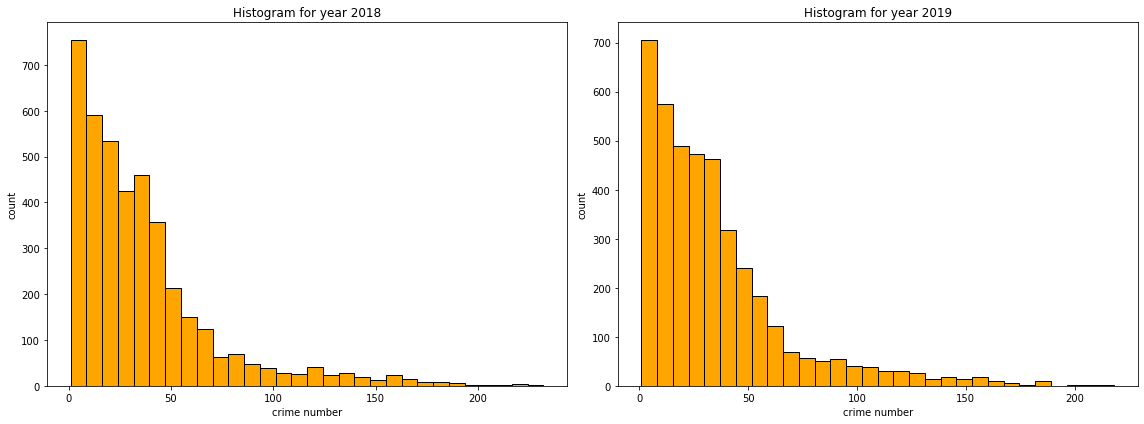

R squared is: 0.6212446013653323
MAE error is: 13.73941975080108
R squared is: 0.2759864779480181
MAE error is: 22.077877717597566


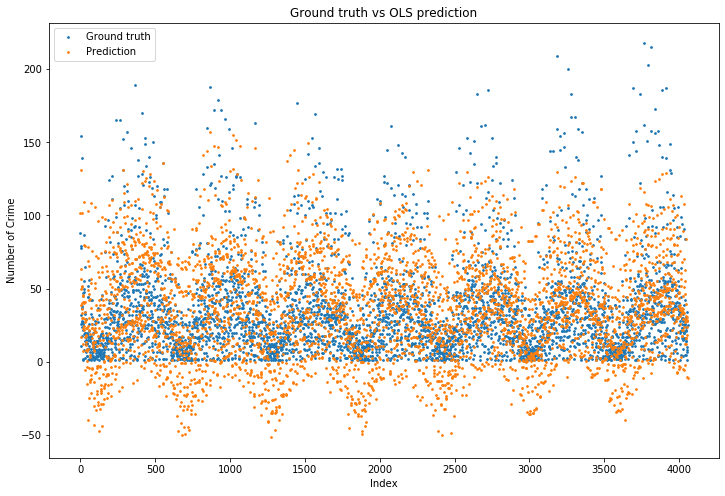

The best alpha for lasso is 0.01
R squared is: 0.764550935511453
MAE error is: 11.518894920165831


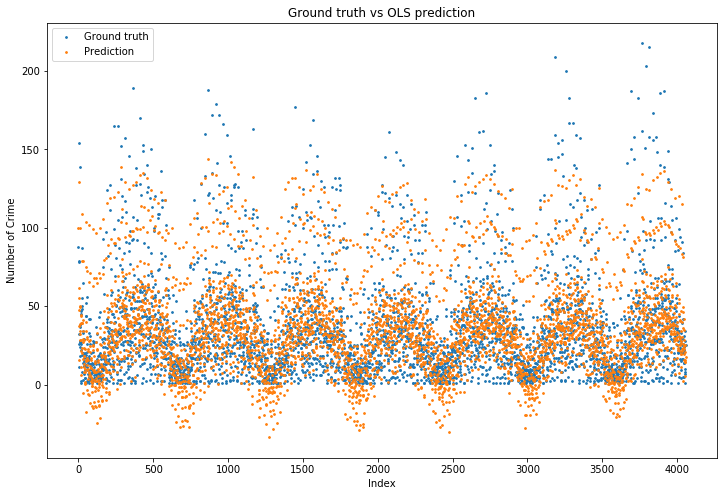

The best alpha for ridge is 1.0
R squared is: 0.7121914832070073
MAE error is: 13.175000701673229


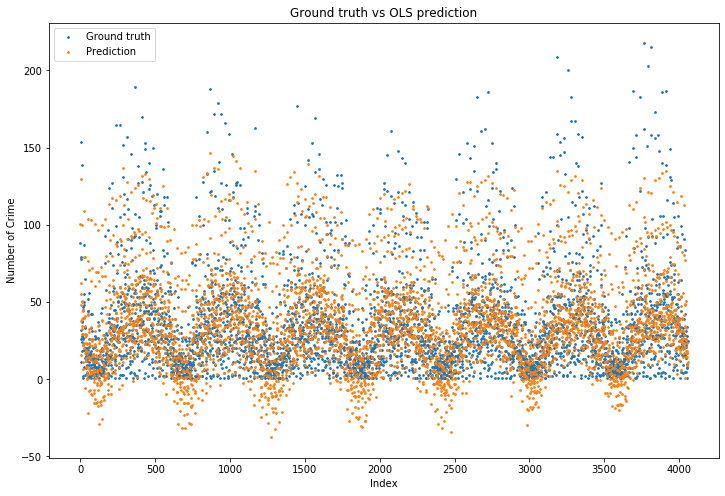

R squared is: 0.8895121385576894
MAE error is: 7.64457825979788


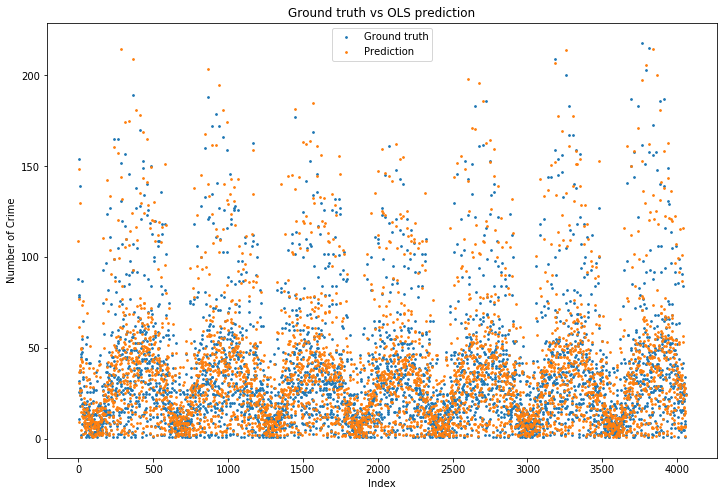

R squared is: 0.6090241673519854
MAE error is: 13.30576780872566


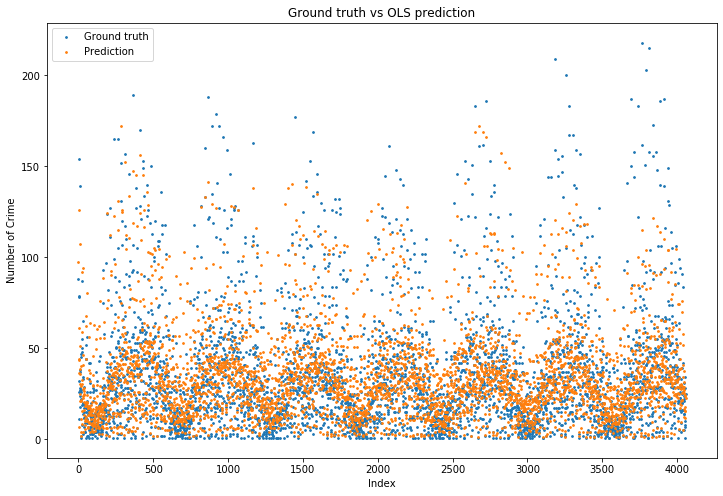

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               5700      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 15,901
Trainable params: 15,901
Non-trainable params: 0
_________________________________________________________________
Train on 3261 samples, validate on 816 samples
Epoch 1/50
3261/3261 [==============================] - 1s 161us/sample - loss: 33.0377 - val_loss: 34.7143
Epoch 2/50
3261/3261 [==============================] - 0s 29us/sample - loss: 28.2424 - val_lo

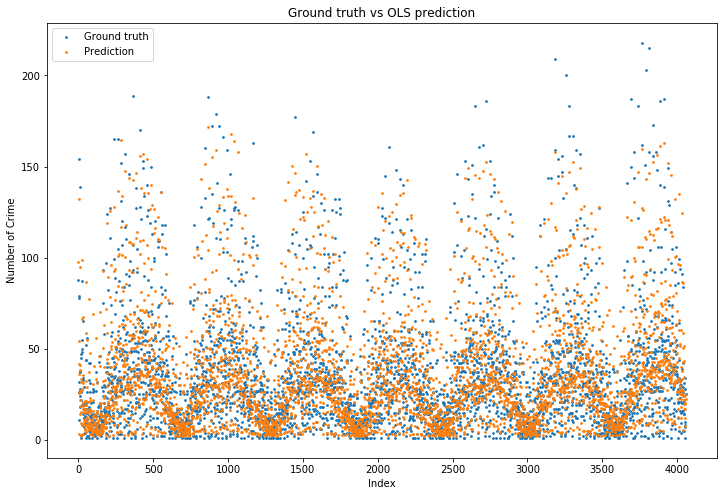

In [2]:
%run 04-predictive_policing_models.ipynb

We make the assumption that the policy office will send more polices to places that has more predicted crimes. If we start sending more police to the areas were we predict more crime, the police will find crime. However, if we start sending more police anywhere, they will also find more crime. This is simply a result of having more police in any given area trying to find crime. This means that our model could be off, but it will always appear right. If police already frequent a neighborhood and search people because of their inherent racial bias, they will already have found more crime. This will mean the model will send them there again and again, and will become a self-fulfilling prophecy.

Suppose we originally sent 20 police to each district of the 25 districts that has different zipcode, but now, we will adjust the number of police sent based on the rank of crimes.

In [198]:
# Find out predicted number of crimes for each district.
Orig_df = df_train.copy()
Orig_df  = Orig_df .groupby(by=['zipcode'],
                       as_index= False).agg({'crime':'sum'}).sort_values('crime', ascending = False)
Orig_df ['average_crime'] = Orig_df ['crime']/52/24/7
Orig_df 

,zipcode,crime,average_crime
1,94103.0,20216,2.314103
0,94102.0,15274,1.748397
7,94110.0,15202,1.740156
5,94108.0,8774,1.004350
6,94109.0,7628,0.873168
8,94111.0,6860,0.785256
13,94117.0,6738,0.771291
2,94104.0,6485,0.742331
15,94122.0,5841,0.668613
17,94124.0,5739,0.656937


Now, we make the adjustment based on the average number of crimes per day per hour. We make another assumption about the relationship of police sent and crimes found: each police has the same ability of finding crimes, as a result, since we have 20 police in each district, we may calculate average number of crimes per district per hour per police.

In [199]:
police_ability = np.mean(Orig_df ['average_crime']/20)
print("The number of crime per hour a police on average is able to find is:",police_ability)

The number of crime per hour a police on average is able to find is: 0.03336927655677655


The number of police sent will be adjusted as follow:

In [200]:
adjust = np.array([12,11,10,9,8,7,6,5,4,3,2,1,0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12])
Orig_df ['adjustment'] = adjust
total_num = np.array([20 for i in range(0,25)])+adjust
Orig_df ['number_police'] = total_num
Orig_df 

,zipcode,crime,average_crime,adjustment,number_police
1,94103.0,20216,2.314103,12,32
0,94102.0,15274,1.748397,11,31
7,94110.0,15202,1.740156,10,30
5,94108.0,8774,1.004350,9,29
6,94109.0,7628,0.873168,8,28
8,94111.0,6860,0.785256,7,27
13,94117.0,6738,0.771291,6,26
2,94104.0,6485,0.742331,5,25
15,94122.0,5841,0.668613,4,24
17,94124.0,5739,0.656937,3,23


Now, we may simulated the number of crimes happen in 2019 based on the adjustment of police:

In [201]:
df_adjust = Orig_df[['zipcode','adjustment']]
dict_adjust = df_adjust.set_index('zipcode').to_dict()['adjustment']
y_adjustment =  round(df_test['zipcode'].apply(lambda x:dict_adjust[x])*police_ability*52,0)
def ReLU(x):
    return x * (x > 0)
y_simulation = ReLU(y_adjustment)+y_test

In [208]:
# Get the 2020 data.
df = pd.read_csv('clean_police_reports.csv')
df['crime'] = 1
df_2020 = df[df['incident_year'] == 2020].copy()

In [209]:
# Create Train and Test periods - 2020
predictors = ['incident_day_of_week', 'incident_month', 'incident_day', 
              'incident_hour', 'zipcode']
target = ['crime']
df_2020 = df_2020[predictors+target]
# Produce crime counts per police_district per day of week + hour
group_by_cols = ['incident_day_of_week', 'incident_hour', 'zipcode']
info_cols = ['zipcode', 'population', 'population_density', 'housing_units',
             'occupied_housing_units', 'median_home_value', 'median_household_income']

df_2020_group = df_2020.groupby(group_by_cols)['crime'].sum().reset_index()
print(df_2020_group.shape)
df_zip_info = df[info_cols].drop_duplicates()
df_2020_group = pd.merge(df_2020_group, df_zip_info, on = 'zipcode', how = 'left')
print(df_2020_group.shape)

(3641, 4)
(3641, 10)


In [210]:
# Get the final version of dataset 2020
X_2020 = df_2020_group.drop(columns = ['crime'])
X_2020_dummy = pd.get_dummies(X_2020, 
                               columns = ['incident_day_of_week','incident_hour','zipcode'], 
                               drop_first = True)
# Standardize the numerical columns.
X_2020_clean = standardize(X_2020_dummy,cols,X_test_dummy)
X_2020_final = X_2020_clean.drop(columns=['population','housing_units','occupied_housing_units'])
# Get y value
y_2020 = df_2020_group['crime'].values

In [211]:
X_2020_final.head()

,incident_day_of_week_Monday,incident_day_of_week_Saturday,incident_day_of_week_Sunday,incident_day_of_week_Thursday,incident_day_of_week_Tuesday,incident_day_of_week_Wednesday,incident_hour_1,incident_hour_2,incident_hour_3,incident_hour_4,...,zipcode_94127.0,zipcode_94129.0,zipcode_94130.0,zipcode_94131.0,zipcode_94132.0,zipcode_94134.0,zipcode_94158.0,population_density,median_home_value,median_household_income
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.051481,-1.382402,-1.758687
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.015100,-1.028731,-1.128947
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1.172373,1.412190,-0.966248
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.344208,-0.287927,2.513649
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.420896,-0.427033,1.018066


In [212]:
# Retrain the model using our simulation data
from tensorflow.keras import layers

validation_split = 0.2
epochs = 50
optimizer = tf.keras.optimizers.RMSprop(5e-4)
model = tf.keras.models.Sequential()
model.add(layers.Dense(units=100, activation='relu', input_dim = X_train_final.shape[1]))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(units=100, activation='relu'))
model.add(layers.Dense(units=1, activation='relu'))
model.compile(loss = 'mae', optimizer = optimizer)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               5700      
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 15,901
Trainable params: 15,901
Non-trainable params: 0
_________________________________________________________________


In [213]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_test_final, y_simulation, batch_size=64, epochs=epochs, 
                    validation_split=validation_split, verbose=1,
                    callbacks=[early_stop])

Train on 3245 samples, validate on 812 samples
Epoch 1/50
3245/3245 [==============================] - 0s 130us/sample - loss: 37.5805 - val_loss: 39.5556
Epoch 2/50
3245/3245 [==============================] - 0s 26us/sample - loss: 32.9957 - val_loss: 34.1802
Epoch 3/50
3245/3245 [==============================] - 0s 25us/sample - loss: 27.3526 - val_loss: 28.0897
Epoch 4/50
3245/3245 [==============================] - 0s 25us/sample - loss: 22.5397 - val_loss: 23.1997
Epoch 5/50
3245/3245 [==============================] - 0s 25us/sample - loss: 19.7925 - val_loss: 20.7666
Epoch 6/50
3245/3245 [==============================] - 0s 24us/sample - loss: 18.0083 - val_loss: 19.2272
Epoch 7/50
3245/3245 [==============================] - 0s 24us/sample - loss: 16.8030 - val_loss: 17.9007
Epoch 8/50
3245/3245 [==============================] - 0s 26us/sample - loss: 15.8518 - val_loss: 16.8019
Epoch 9/50
3245/3245 [==============================] - 0s 23us/sample - loss: 14.9036 - val_los

In [232]:
# Check the average crime per week for each district through the year.
y_pred_2020 = model.predict(X_2020_final)/4

In [241]:
df_2018 = df_train.copy()
df_2018 = df_2018.groupby(by=['zipcode'],
                       as_index= False).agg({'crime':'sum'})
df_2019 = df_test.copy()
df_2019['simulated_crime'] = y_simulation
df_2019_orig = df_2019.groupby(by=['zipcode'],
                       as_index= False).agg({'crime':'sum'})
df_2019_sim = df_2019.groupby(by=['zipcode'],
                       as_index= False).agg({'simulated_crime':'sum'})
df_2020 = df_2020_group.copy()
df_2020['crime'] = y_pred_2020
df_2020 = df_2020.groupby(by=['zipcode'],
                       as_index= False).agg({'crime':'sum'})
Total_df = df_2018.copy().drop('crime',1)
Total_df['avg_crime_2018'] = df_2018['crime']/52
Total_df['avg_crime_2019'] = df_2019_orig['crime']/52
Total_df['avg_crime_2019_sim'] = df_2019_sim['simulated_crime']/52
Total_df['avg_crime_2020_pred'] = df_2020['crime']/13
Total_df["zipcode"] = Total_df["zipcode"].astype('category')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

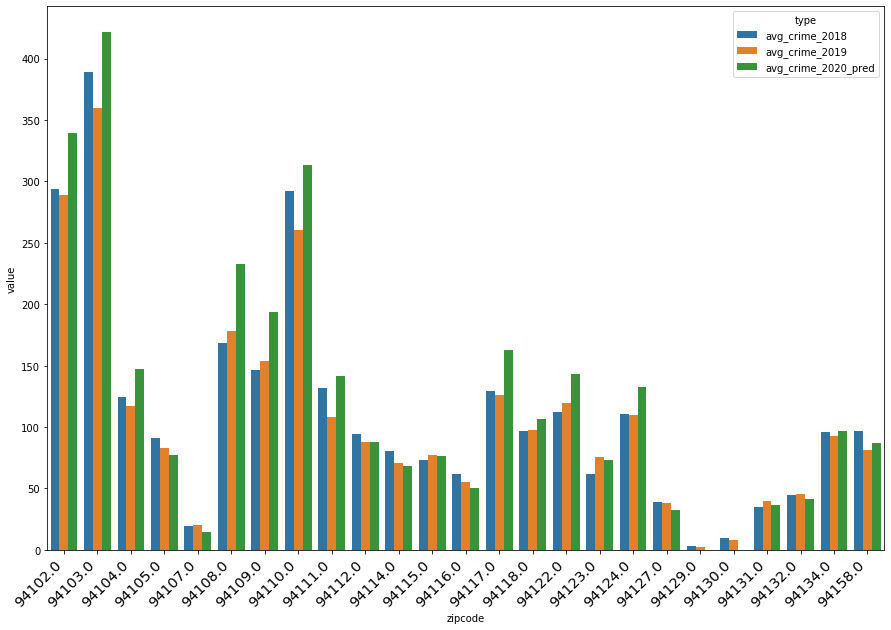

In [273]:
# Make the plot
plt.figure(figsize=(15,10))
def gather( df, key, value, cols ):
    id_vars = [ col for col in df.columns if col not in cols ]
    id_values = cols
    var_name = key
    value_name = value
    return pd.melt( df, id_vars, id_values, var_name, value_name )
Total_df_plot = gather(Total_df,'type','value',['avg_crime_2018','avg_crime_2019','avg_crime_2020_pred'])
chart = sns.barplot(x="zipcode", hue="type", y="value", data=Total_df_plot)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

From the above graph, it is clearly that based on our assumption, if we starts to send more police to places where crime is high, then the predicted crime will be even higher. If police already frequent a neighborhood and search people because of their inherent racial bias, they will already have found more crime. This will mean the model will send them there again and again, and will become a self-fulfilling prophecy.